### Example - diffraction turbulence

In [1]:
%load_ext autoreload
%autoreload 2

from diffractio import degrees, mm, um
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.utils_optics import field_parameters

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Parameters:
num_pixels  =   513
length      =   10 * mm
x0          =   np.linspace(-length / 2, length / 2, num_pixels)
y0          =   np.linspace(-length / 2, length / 2, num_pixels)
# Optical system
wavelength  =   1.053 * um     # Laser Wavelength
L           =   400 * mm                # this is 2*Focal Length, assumed based on the IRL setup

In [2]:
# Define fields and relative optical elements
source  = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)            # Light source defined XY plane
l0      = Scalar_mask_XY(x=x0, y=y0, wavelength = wavelength)            # Lens 0 - first lens of the imaging refractomer diagnostic
l1      = Scalar_mask_XY(x=x0, y=y0, wavelength = wavelength)            # lens 1 - second lens - hybrid lens  

source.gauss_beam(
    A=1,
    r0=(0 * um, 0 * um),
    z0=0 * mm,
    w0=(6.7 * mm, 6.7 * mm),
    phi= 0,
    theta= 0
)

l0.lens(
    r0=(0 * mm, 0 * mm),
    radius=(25 * mm, 25 * mm),
    focal=(L/2, L/2),
    angle=0 * degrees
)

l1.lens(
    r0=(0 * mm, 0 * mm),
    radius=(25 * mm, 25 * mm),
    focal=(L/3, L/2),
    angle=0 * degrees
)

t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.roughness(t = (200 * um, 200 * um), s = 0.4 * um)

array([[-0.25677902, -0.27435434, -0.2815282 , ..., -0.48602692,
        -0.43251256, -0.37127944],
       [-0.27600638, -0.29335941, -0.29922516, ..., -0.48644979,
        -0.43252706, -0.37134491],
       [-0.28575429, -0.30209589, -0.30617088, ..., -0.47018484,
        -0.41754045, -0.35860043],
       ...,
       [ 0.04309543,  0.10622631,  0.18195655, ...,  0.62449234,
         0.67191865,  0.71088146],
       [ 0.01859506,  0.08446805,  0.1637553 , ...,  0.67372407,
         0.71009736,  0.73753384],
       [-0.00129575,  0.0667058 ,  0.14859285, ...,  0.73096294,
         0.75497391,  0.76959405]])

(<Figure size 480x360 with 1 Axes>,
 <Axes: xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x7f54e5c76390>)

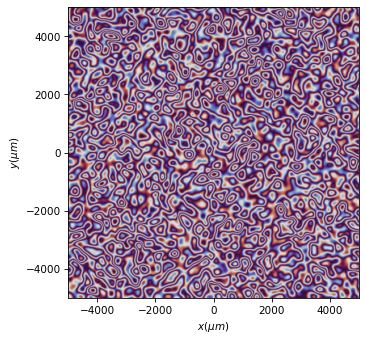

In [3]:
t1.draw('phase')

In [4]:
# Beam Propagation through the system
# source --> l0 --> r0 --> l1 --> detector

u  = source                    # propagate beam through turbulent element
nz = 20                         # number of phase screens
dz = length/nz                 # propagation step

for l in range(nz+1):
    if l == 0 or l == nz:
        u    = u.RS(z = dz/2, new_field=True)            
    else:
        u    = u.RS(z = dz, new_field=True) 
    u *= t1

u1 = u.RS(z = L, new_field=True)            # propagate until l0
u2 = u1 * l0                                # propagate beam through lens 0
u3 = u2.RS(z = 3 * L / 2, new_field=True)   # propagate until l1
u4 = u3 * l1                                  # propagate beam through lens 1
u5 = u4.RS(z = L, new_field=True)           # propagate until detector

## Compute background response
u_bkg  = source
u1_bkg = u_bkg.RS(z = L, new_field=True)            # propagate until l0
u2_bkg = u1_bkg * l0                                # propagate beam through lens 0
u3_bkg = u2_bkg.RS(z = 3 * L / 2, new_field=True)   # propagate until l1
u4_bkg = u3_bkg * l1                                  # propagate beam through lens 1
u5_bkg = u4_bkg.RS(z = L, new_field=True)           # propagate until detector

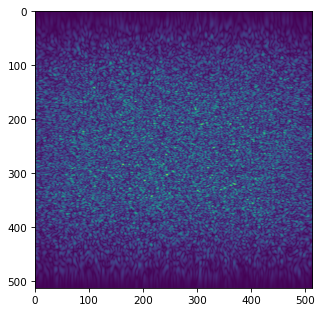

In [5]:
plt.imshow(abs(u5.u))

### Use TurboGen to create a phase screen

In [6]:
def power_spectrum(k,a):
    return k**-a

def k41_3D(k):
    return power_spectrum(k, 11/3)

In [7]:
# Beam Propagation through the system
# source --> l0 --> r0 --> l1 --> detector
t1 = Scalar_mask_XY(x = x0, y = y0, wavelength = wavelength)
t1.turbulence(256, k41_3D)

AttributeError: 'Scalar_mask_XY' object has no attribute 'turbulence'

In [ ]:
u  = source                    # propagate beam through turbulent element
nz = 100                         # number of phase screens
dz = length/nz                 # propagation step

for l in range(nz+1):
    if l == 0 or l == nz:
        u    = u.RS(z = dz/2, new_field=True)          
    else:
        u    = u.RS(z = dz, new_field=True)  
    u *= t1

u1 = u.RS(z = L, new_field=True)            # propagate until l0
u2 = u1 * l0                                # propagate beam through lens 0
u3 = u2.RS(z = 3 * L / 2, new_field=True)   # propagate until l1
u4 = u3 * l1                                  # propagate beam through lens 1
u5 = u4.RS(z = L, new_field=True)           # propagate until detector

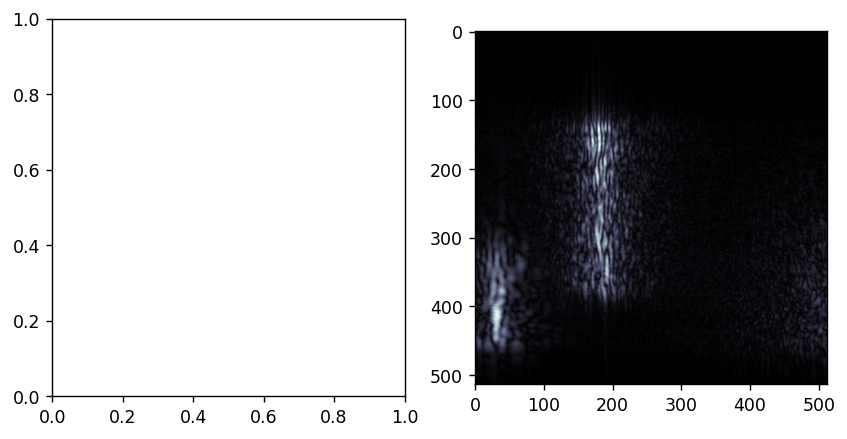

In [ ]:
fig, (ax0, ax1) = plt.subplots(1,2,figsize = (8,4))

ax1.imshow(abs(u5.u), cmap = 'bone' )